### Monte Carlo Simulation
[Numpy Random website](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

In [3]:
#Runs these import commands
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

**Scenario M1: Estimate PI**

Consider a quarter circle inscribed inside a unit square.  Radius of circle is 1.

$Area_{quartercircle} = \pi /4$ and $Area_{square} = 1$

Now, suppose we randomly sample points, then $Area_{quartercircle} \approx \text{number_of_points_inside_circle}$

$\pi = 4*$ number_of_points_inside_circle / n


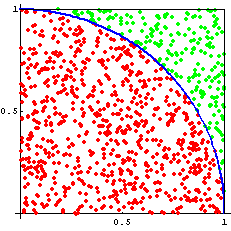


**Algorithm:**
```
for i in range(n):
  Generate x ~ Unif[0,1]
  Generate Y ~ Unif[0,1]
  if (x^2 + y^2) <=1:
    count_in_circle =  count_in_circle + 1

Estimate PI as 4*count_in_circle/n
```
If you find it difficult to code the above algorithm, [click here](https://colab.research.google.com/drive/16J2P2avSv1A-gzo8VO6sV7qlWfhpRO7b#scrollTo=gP3uwij_xqwW&line=1&uniqifier=1) for the hint. 


In [11]:
#Write your code here. Estimate pi for various values of number of samples
N = 100000
count = 0
for i in range(N):
    if (rnd.uniform(0,1)**2 + rnd.uniform(0,1)**2 <=1):
        count = count+1

print(count/N)
    
print("Estimated pi value:" , 4*count/N)

0.78786
Estimated pi value: 3.15144



**Scenario M2** A project consists of three tasks: A, B and C. Task A and B can be done in parallel, while C can being only after A and B are completed. The time for task A, is exponentially distributed with mean 10 hours; the time for task B is uniformly distributed between 6 and 14 hours; and the time for task C, is normally distributed with mean 10 hours and std. dev. 3.
What is the probability that the project will be completed within 22 hours?

*Algorithm*
```
for i in range(n):
  Generate A ~ Expo(mean=10 hours)
  Generate B ~ Unif[6, 14]
  Generate C ~ Normal(mean=10, s.d=3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1
 
Estimate Probability as count /n
```

If you find it difficult to code the above algorithm, [click here](https://colab.research.google.com/drive/16J2P2avSv1A-gzo8VO6sV7qlWfhpRO7b#scrollTo=2k4TH0it3iCO&line=6&uniqifier=1) for the hint. 

In [12]:
#Write your code here
N = 10000
count = 0

A=0
B=0
C=0

for i in range(N):
    A = rnd.exponential(10)
    B = rnd.uniform(6,14)
    C = rnd.normal(loc = 10 ,scale = 3)
    if( max(A,B) +C <= 22):
        count = count + 1
        
print(count/N)

0.5011


In [10]:
help(rnd.exponential)

Help on built-in function exponential:

exponential(...) method of numpy.random.mtrand.RandomState instance
    exponential(scale=1.0, size=None)
    
    Draw samples from an exponential distribution.
    
    Its probability density function is
    
    .. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),
    
    for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
    which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
    The rate parameter is an alternative, widely used parameterization
    of the exponential distribution [3]_.
    
    The exponential distribution is a continuous analogue of the
    geometric distribution.  It describes many common situations, such as
    the size of raindrops measured over many rainstorms [1]_, or the time
    between page requests to Wikipedia [2]_.
    
    .. note::
        New code should use the ``exponential`` method of a ``default_rng()``
        instance instead; please see the :ref

**Scenario M3: Simulating Markov chains**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is
Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.

(a) Estimate the probability that the rat dies by poison.

(b) What is the expected duration the rat lives?

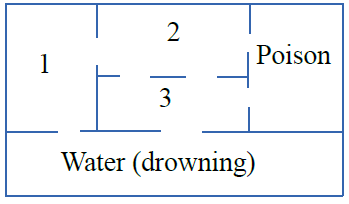

*Algorithm*
```
durations=[]
Poisoncount = 0

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timespent=0.0
  while (currentCell not in [4, 5]):
    timespent = timespent + Gamma(4,3*currentCell)
    if currentCell == 1:
      #choose cell 1 or 5 randomly  #5 can indicate Water cell
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
    else: #currentCell is 3
      #choose cell 2 or 4 or 5 
  
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  durations.append(timespent)

##print the results
```


If you find it difficult to code the above algorithm, [click here](https://colab.research.google.com/drive/16J2P2avSv1A-gzo8VO6sV7qlWfhpRO7b#scrollTo=VzYQSWm28FAX&line=19&uniqifier=1) for hint. 

In [15]:
#Write your code here
currentCell = 0
timespent=0.0
z=0

durations=[]
Poisoncount = 0
Watercount = 0
n= 100000

for i in range(n): 
    currentCell=1
    timespent=0.0
    while (currentCell not in [4, 5]):
            timespent = timespent + rnd.gamma(4,3*currentCell)
            if currentCell == 1:
                z = rnd.randint(0,2)
                if z == 0:
                    currentCell = 2
                if z == 1:
                    currentCell = 5
            elif currentCell == 2:
                z = rnd.randint(0,3)
                if z == 0:
                    currentCell = 1
                if z == 1:
                    currentCell = 3
                if z == 2:
                    currentCell = 4
            else: #currentCell is 3
                z = rnd.randint(0,3)
                if z == 0:
                    currentCell = 2
                if z == 1:
                    currentCell = 5
                if z == 2:
                    currentCell = 4
    if currentCell == 4:
        Poisoncount = Poisoncount+1
        
    if currentCell == 5:
        Watercount = Watercount+1

    durations.append(timespent)

In [16]:
#(a) Estimate the probability that the rat dies by poison.
print("Probability that the rat dies by poison:" , Poisoncount/n)
print("Probability that the rat dies by water:" , Watercount/n)

#(b) What is the expected duration the rat lives?
print("Expected duration the rat lives:" , np.mean(durations))

Probability that the rat dies by poison: 0.30556
Probability that the rat dies by water: 0.69444
Expected duration the rat lives: 39.6510988546523


In [67]:
help( rnd.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

**Exercise 1: Inventory model**

Newspaper vendor at a railway station buys newspaper at Rs. 3.50 and sells it at Rs.4.50. At the end of the day, the unsold newspapers are sold to raddhiwala for Rs.0.25. Estimate the expected profit if the vendor buys 40 newspapers.

Compare the results when:

*   Demand for newspaper is Poisson random variable with mean 50
*   Demand for newspaper is Normal random variable with mean 50 & s.d. 5

In [84]:
#Write your code here. 
#Poisson random variable
N = 40
demand = 0
earn = 0

demand = rnd.poisson(50)
#print(sold)
if demand >= N:
    earn = 1*N 
else:
    earn = 1*demand + (.25-3.5)*(N-demand)
    
print(earn)
    

31.5


In [85]:
#Write your code here. 
#Normal random variable
N = 40
demand = 0
earn = 0

demand = rnd.normal(loc =50 , scale = 5)
#print(sold)
if demand >= N:
    earn = 1*N
else:
    earn = 1*demand + (.25-3.5)*(N-demand)
    
print(earn)
    

40


In [86]:
#Here we are assuming 0.5 INR penatly for each loss of demand
penalty = 0.5
N = 40
demand = 0
earn = 0

demand = rnd.poisson(50)
#print(sold)
if demand >= N:
    earn = 1*N +(N-demand)*penalty
else:
    earn = 1*demand + (.25-3.5)*(N-demand)
    
print(earn)
    

37.5


**Exercise 2: Profit forecasting model**

Use Monte Carlo simulation to estimate the mean and standard deviation
in the profit of the company **ALPHA**. Also estimate the probability of
making a profit.


*   The profit of company **ALPHA** are determined by the income minus 
expenses where both income and expenses are uncertain parameters.
*   Income comes solely from the number of sales (**S**) multiplied by the
profit per sale (**P**) resulting from an individual purchase of a gadget. The profit per sale takes into account the sale price, the initial cost to manufacturer or purchase the product wholesale, and other transaction fees (credit cards, shipping, etc.). **P** may fluctuate between Rs 470 and Rs 530.
*   Company **ALPHA** generates sales through purchasing leads. The number of
sales per month is the number of leads per month (**L**) multiplied by
the conversion rate (**R**) (the percentage of leads that result in sales). The conversion rate of the company **ALPHA** varies from 1% to 5%.
*   Consider the Expenses to be a combination of fixed overhead (**H**)
plus the total cost of the leads.
*   The cost of a single lead (**C**) varies between Rs 2 and Rs 8. Based
upon some market research, the Company expects the number of
leads per month (**L**) to vary between 1200 and 1800. Let the fixed overhead be Rs 8000.
*  Assume all the uncertainities to be uniformly random. 


If you find it difficult to code the above algorithm, [click here](https://colab.research.google.com/drive/16J2P2avSv1A-gzo8VO6sV7qlWfhpRO7b#scrollTo=VzYQSWm28FAX&line=19&uniqifier=1) for hint. 


In [79]:
#Write your code here
N = 2000
profit = 0

#number of sales (S) multiplied by the profit per sale (P)
#Income , I = S*P
S = 0
P = 0

# number of sales per month is the number of leads per month (L) multiplied by the conversion rate (R)
L= 0

#conversion rate (R)
R = 0
for i in range(N):
    R = rnd.uniform(.01,.05)
    
    P = rnd.uniform(470,520)
    L = rnd.uniform(1200,1800)
    H = 8000
    C = rnd.uniform(2,8)
    S = L*R
    
    E = H + L*C
    I=S*P 
    
    profit = profit + I-E
    
profit = profit /N

print(profit)
    
    



6813.883325086688
